<a href="https://colab.research.google.com/github/migub/recommender-systems/blob/main/Notebooks/music_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Loading dataset...

=== BASIC DATASET INFORMATION ===
Dataset shape: (7558834, 15)
Total records: 7558834
Total features: 15

Feature names:
- genre_id
- ts_listen
- media_id
- album_id
- context_type
- release_date
- platform_name
- platform_family
- media_duration
- listen_type
- user_gender
- user_id
- artist_id
- user_age
- is_listened

=== MISSING VALUES ===
Empty DataFrame
Columns: [Missing Values, Percentage]
Index: []

=== DATA TYPES ===
genre_id           int64
ts_listen          int64
media_id           int64
album_id           int64
context_type       int64
release_date       int64
platform_name      int64
platform_family    int64
media_duration     int64
listen_type        int64
user_gender        int64
user_id            int64
artist_id          int64
user_age           int64
is_listened        int64
dtype: object

=== DESCRIPTIVE STATISTICS ===
                     count          mean           std         min  \
genre_id         7558834.0  2.245030e+03  1.308979e+04     

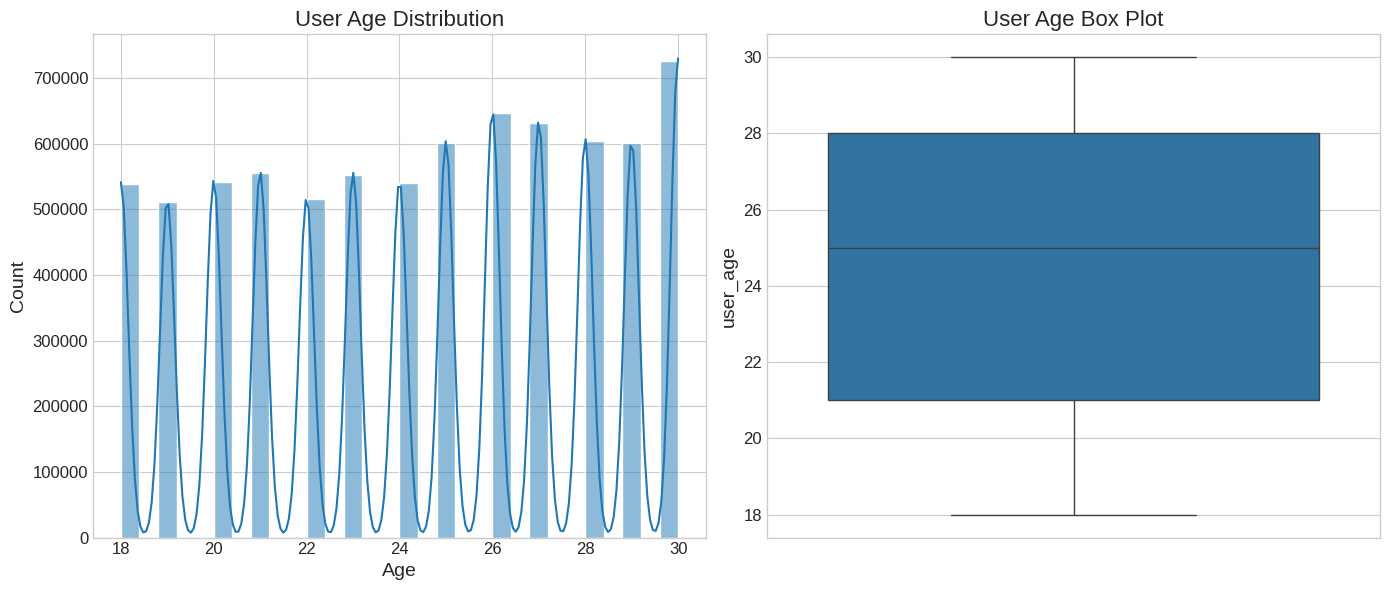

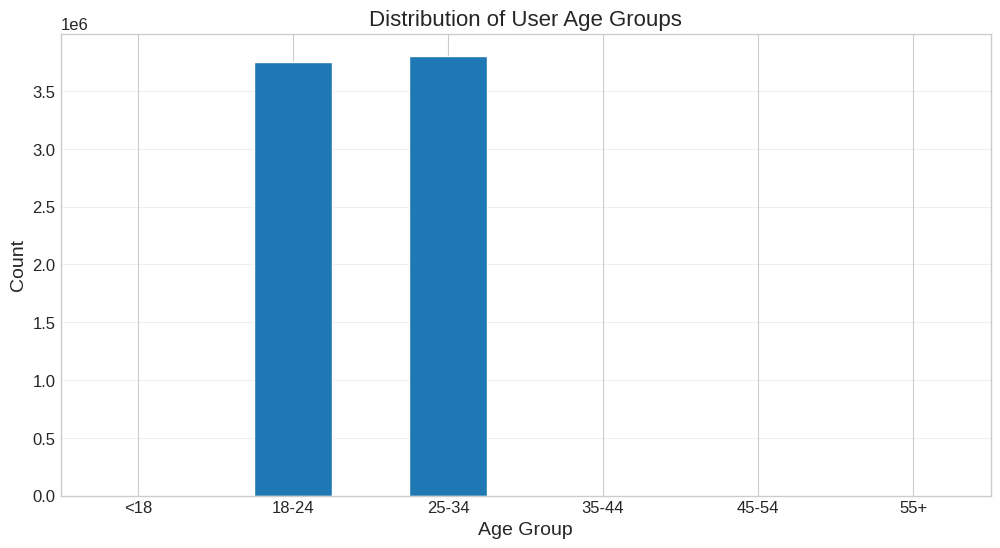

<ipython-input-6-b213532a3afa>:107: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  user_engagement_by_age = df.groupby('age_group')['user_id'].nunique()
<ipython-input-6-b213532a3afa>:108: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  interactions_by_age = df.groupby('age_group').size()


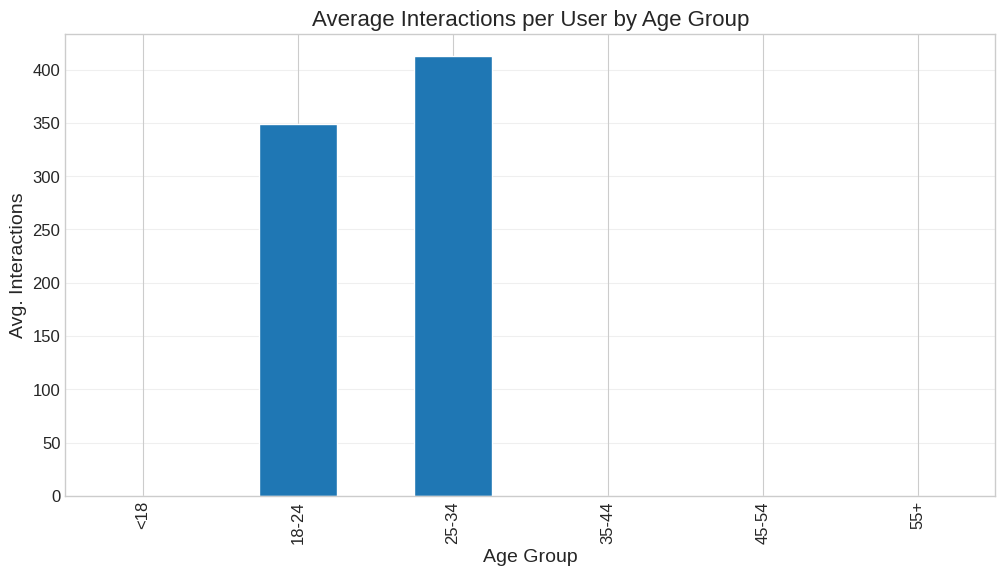


--- User Age Analysis ---
Age range: 18 to 30 years
Mean age: 24.31 years
Median age: 25.0 years

Age Group Distribution:
  <18: 0.00%
  18-24: 49.64%
  25-34: 50.36%
  35-44: 0.00%
  45-54: 0.00%
  55+: 0.00%


=== ARTIST ANALYSIS ===
Total unique artists: 67142
Average interactions per artist: 112.58
Median interactions per artist: 3.0


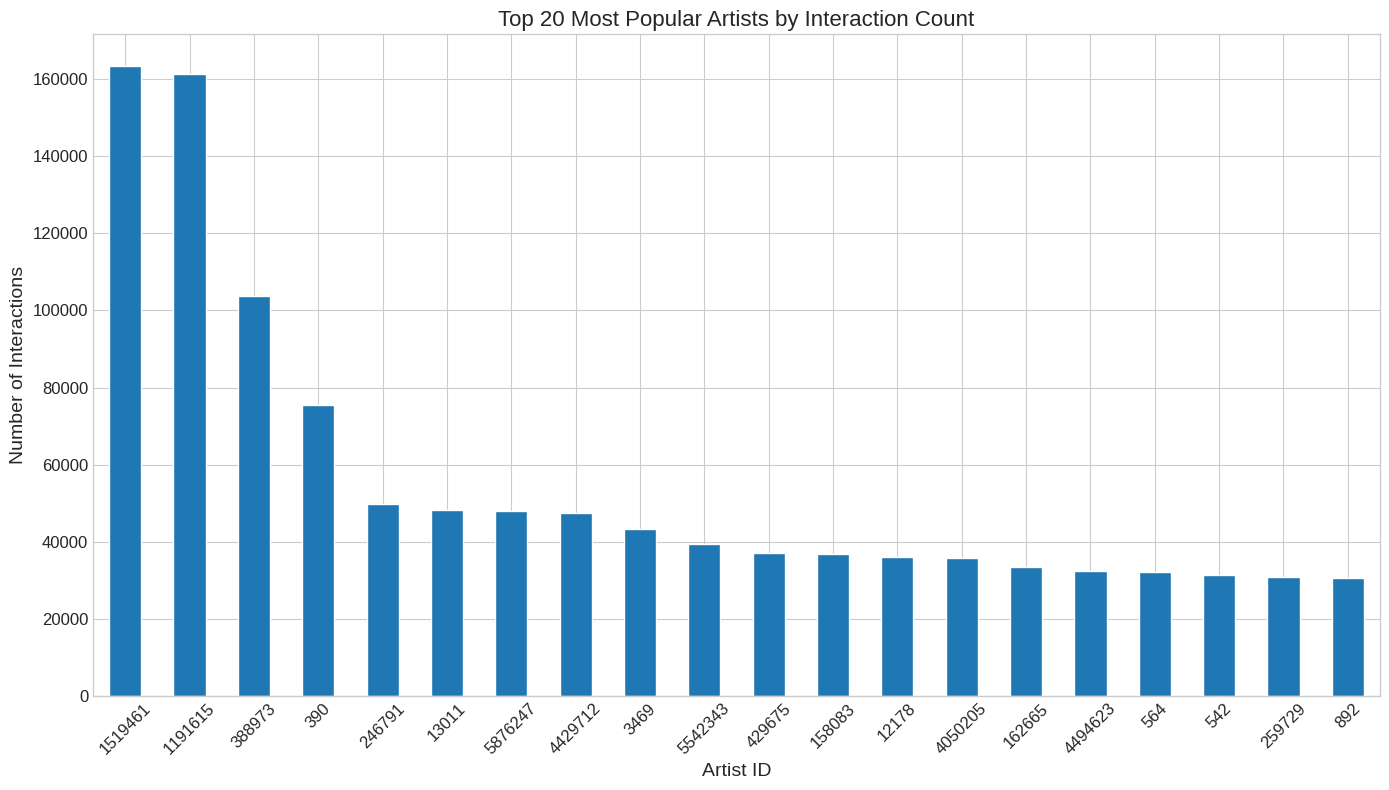

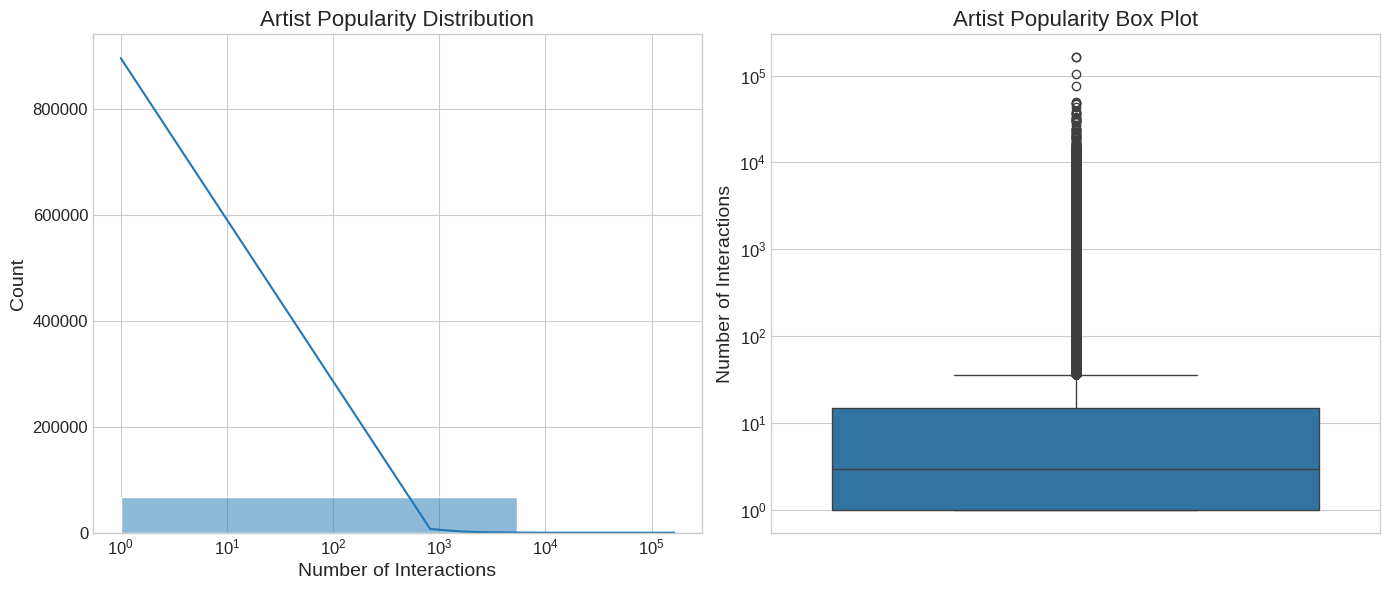


--- Artist Popularity Analysis ---
Most popular artist has 163420 interactions
Least popular artist has 1 interactions
Mean interactions per artist: 112.58
Median interactions per artist: 3.0


=== MEDIA (SONG) ANALYSIS ===
Total unique songs/media: 452975
Average interactions per song: 16.69
Median interactions per song: 2.0


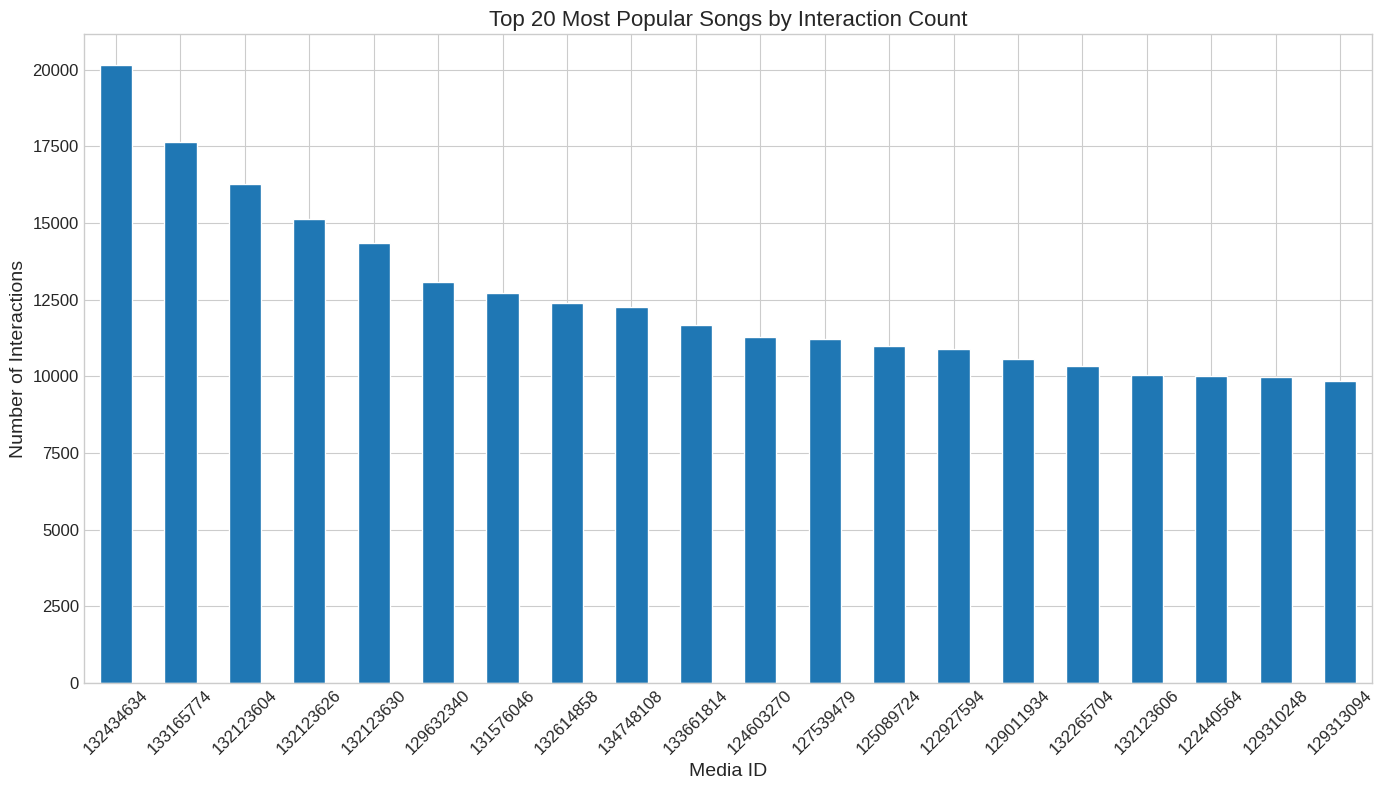

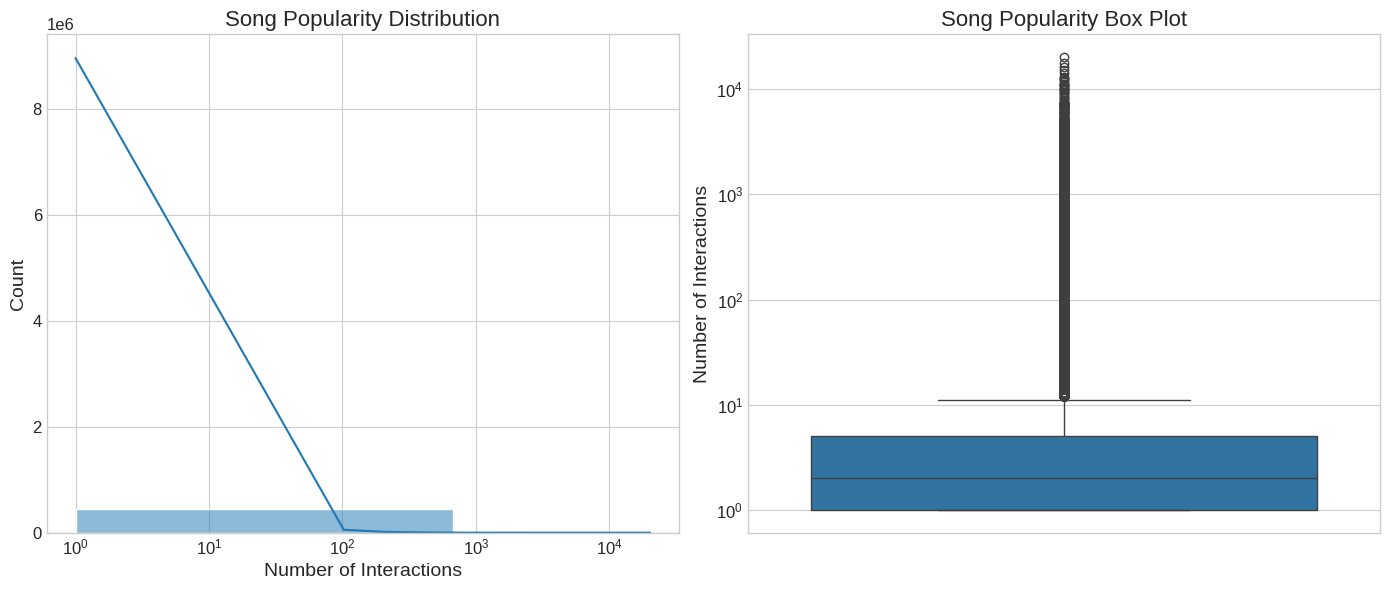

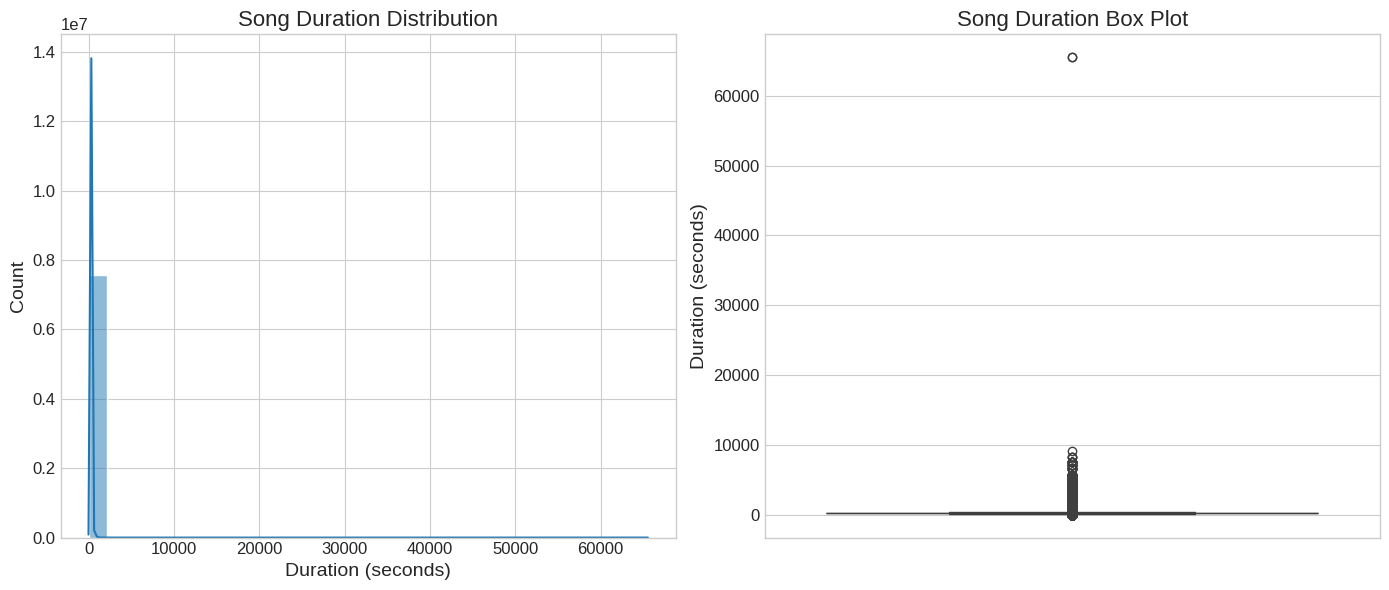


--- Song Duration Analysis ---
Duration range: 0 to 65535 seconds
Mean duration: 231.15 seconds (3.85 minutes)
Median duration: 222.0 seconds (3.70 minutes)


=== PLATFORM ANALYSIS ===
Total platforms: 3


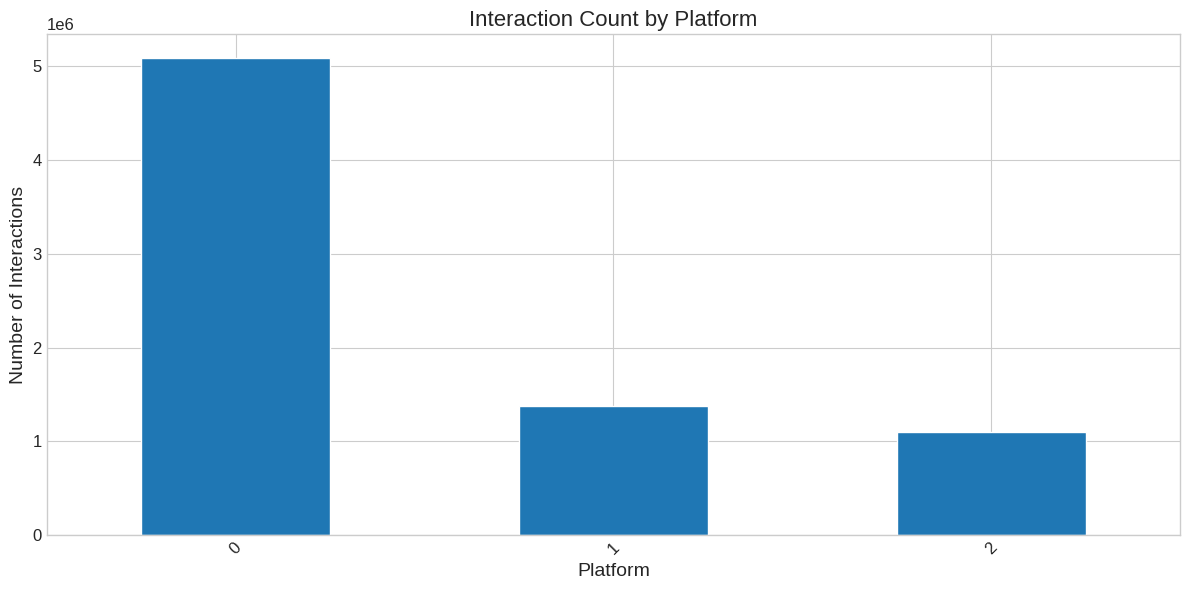

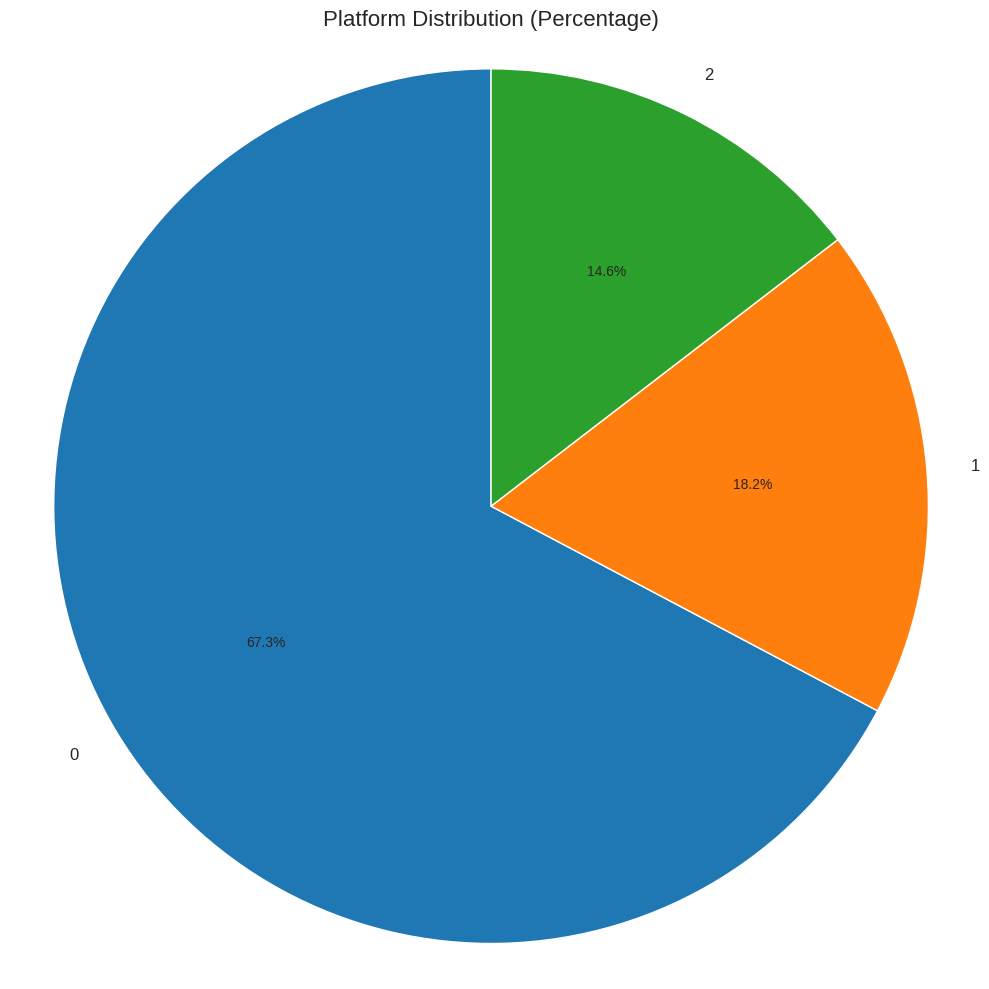


--- Platform Distribution ---
  0: 67.25%
  1: 18.18%
  2: 14.57%


=== TEMPORAL ANALYSIS ===


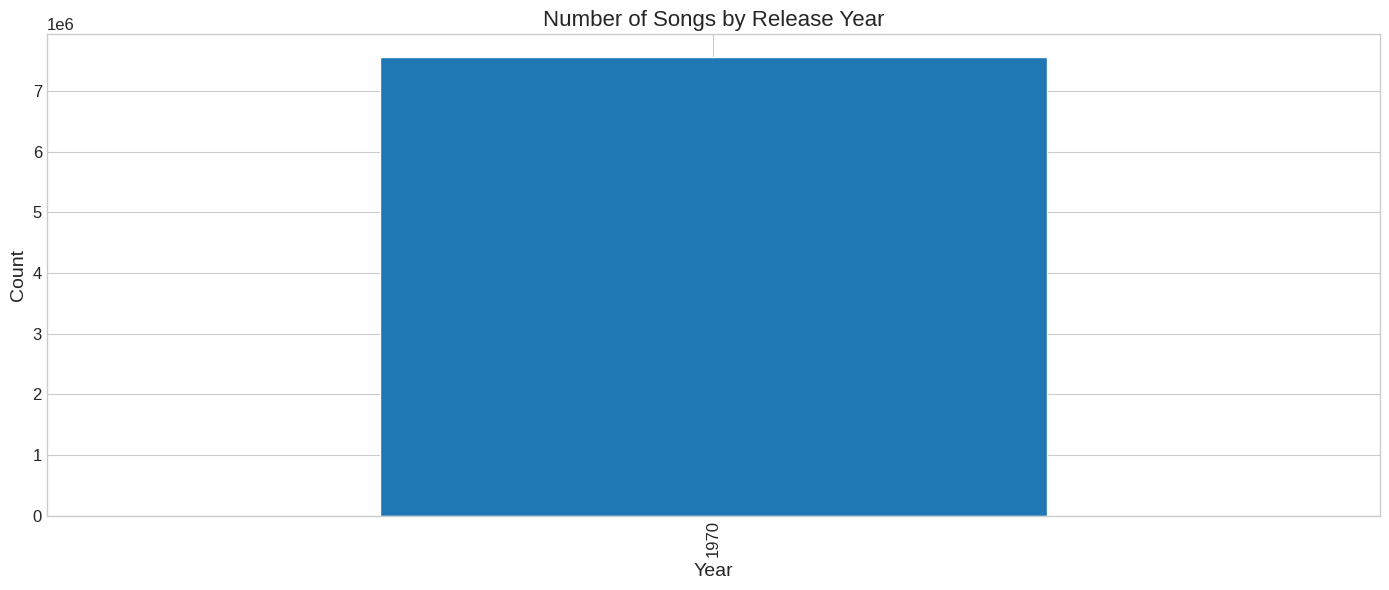

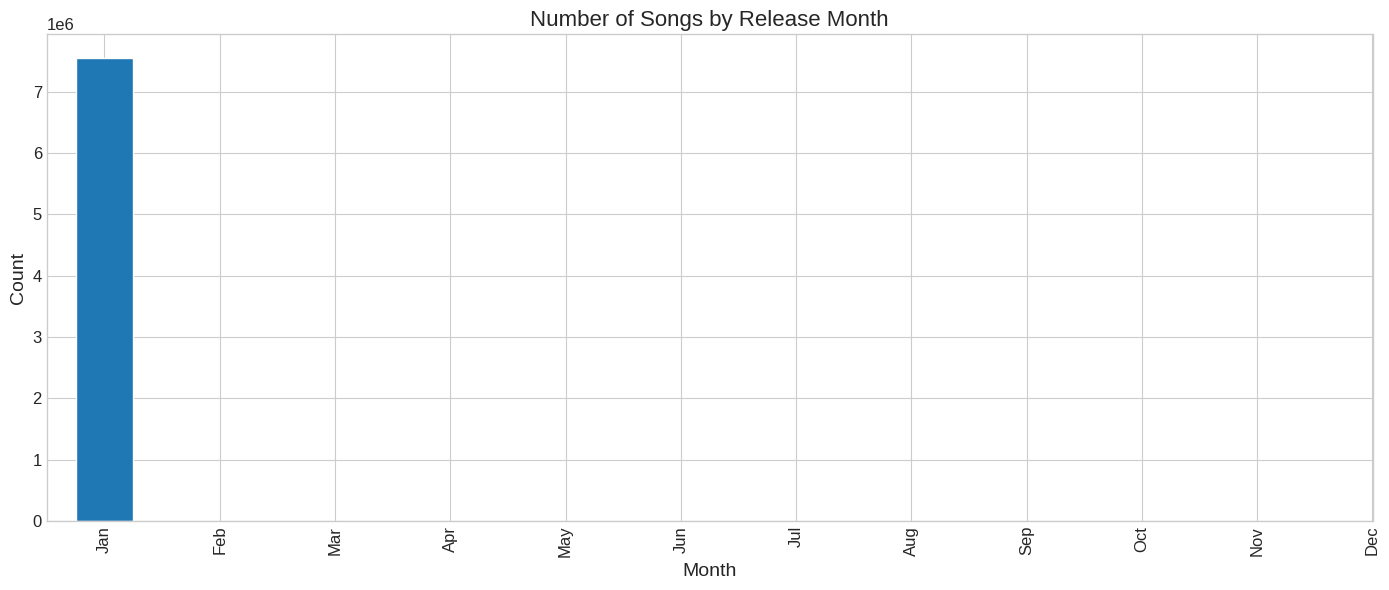



=== CORRELATION ANALYSIS ===


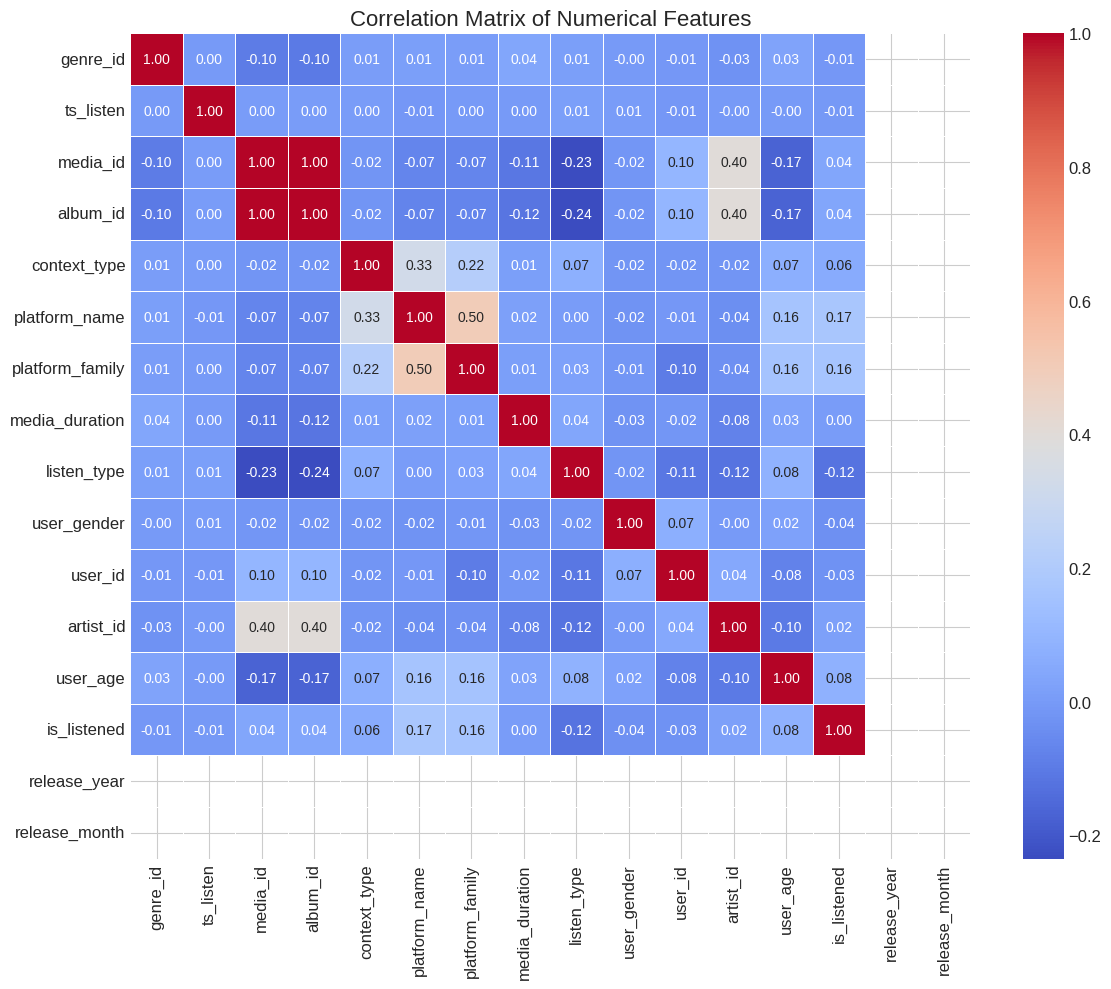



=== USER-ARTIST INTERACTION ANALYSIS ===


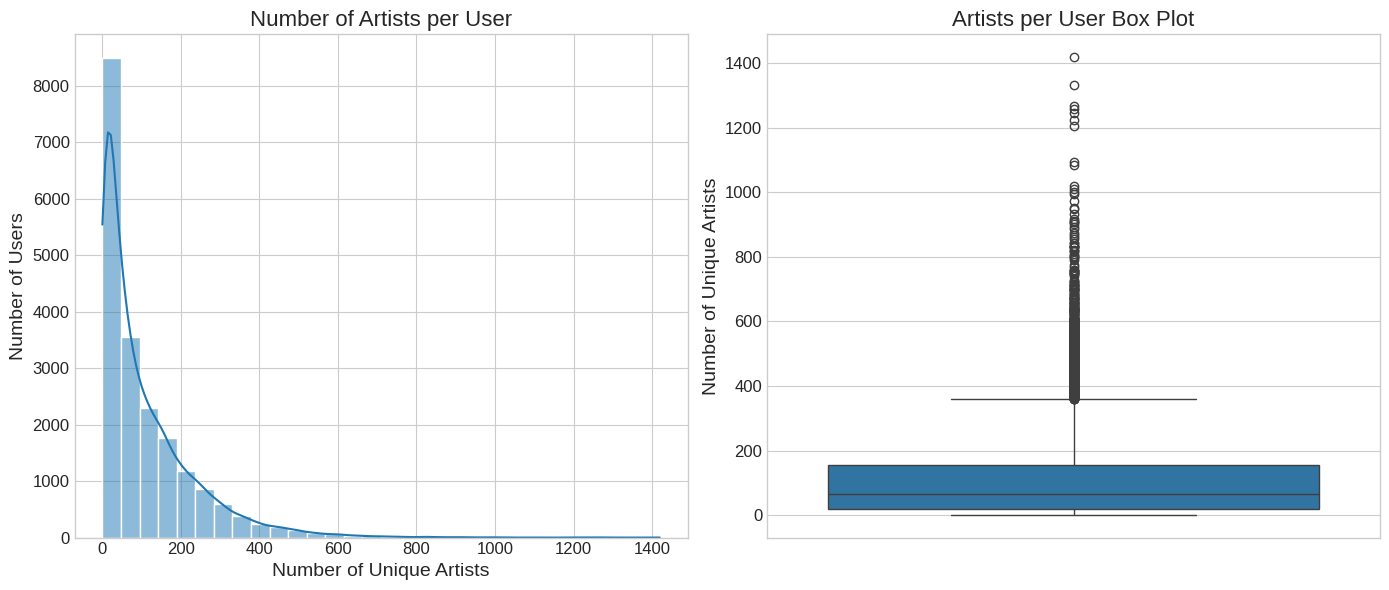

Average number of artists per user: 109.37
Median number of artists per user: 64.0
Most diverse user listens to 1419 different artists


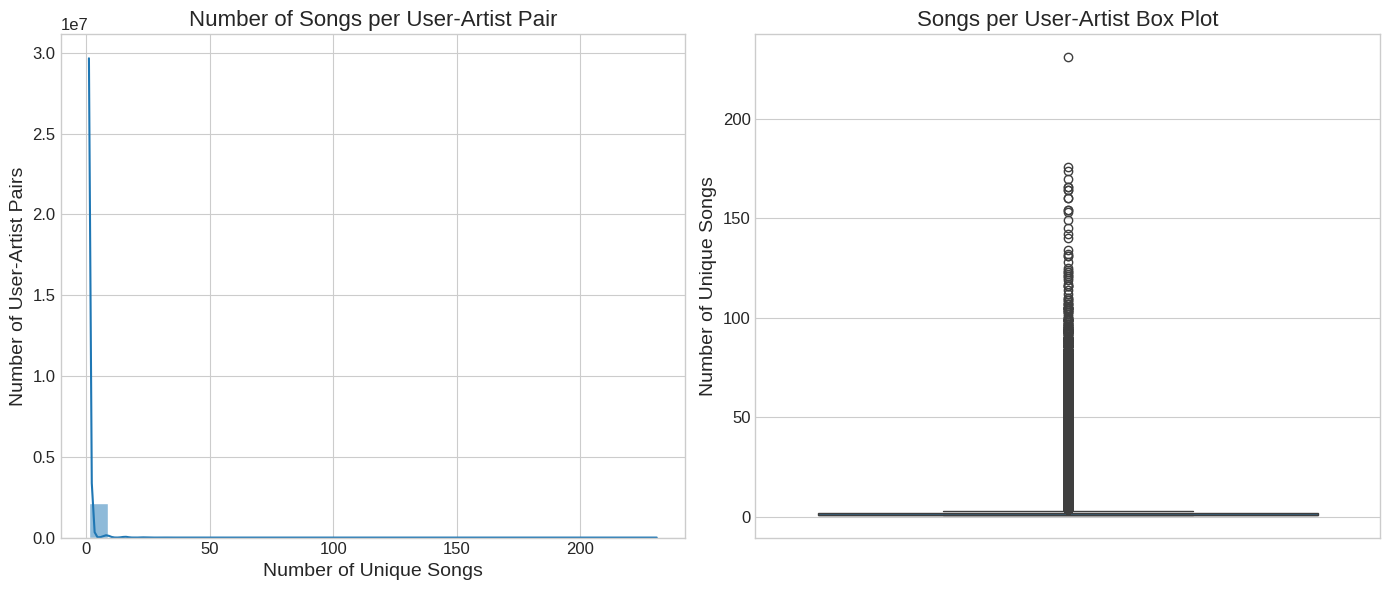

Average number of songs per user-artist pair: 1.83
Median number of songs per user-artist pair: 1.0


=== LISTENING PATTERNS ANALYSIS ===


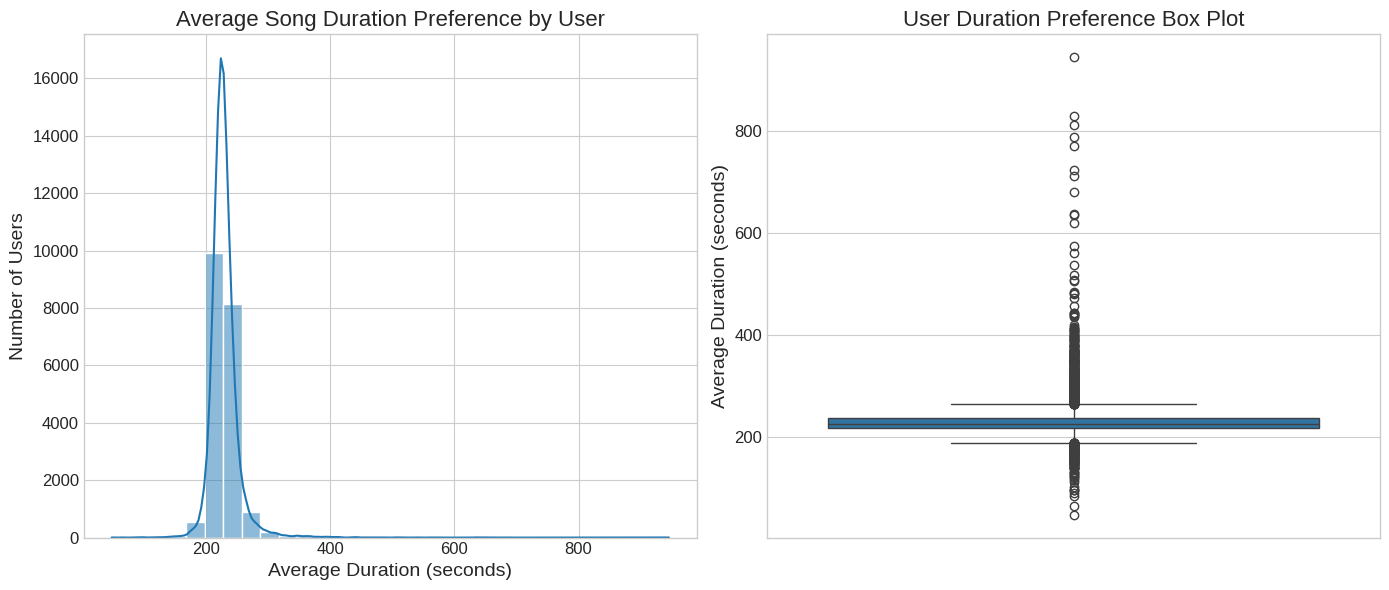

Average preferred duration across users: 229.47 seconds (3.82 minutes)


=== RECOMMENDATION POTENTIAL ANALYSIS ===
Interaction matrix shape: 19918 users × 452975 items
Total possible interactions: 9022356050
Actual interactions: 7558834
Matrix sparsity: 99.92%

Potential cold-start users (less than 5 interactions): 567 (2.85%)
Potential cold-start items (less than 5 interactions): 334710 (73.89%)


=== SUMMARY ===
Total records: 7558834
Unique users: 19918
Unique artists: 67142
Unique songs: 452975
Platforms: 3
Interaction density: 0.0838%
Average interactions per user: 379.50

The dataset contains information suitable for the following recommendation approaches:
1. Collaborative Filtering (user-item interactions)
2. Content-Based Filtering (using artist and song metadata)
3. Hybrid Methods (combining both approaches)

EDA complete!


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.preprocessing import MinMaxScaler
from collections import Counter

# Set visual styles
sns.set_style("whitegrid")
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Load the dataset
print("Loading dataset...")
df = pd.read_csv('/content/drive/MyDrive/Recommender_Systems/train.csv')

# Display basic information
print("\n=== BASIC DATASET INFORMATION ===")
print(f"Dataset shape: {df.shape}")
print(f"Total records: {df.shape[0]}")
print(f"Total features: {df.shape[1]}")
print("\nFeature names:")
for col in df.columns:
    print(f"- {col}")

print("\n=== MISSING VALUES ===")
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percent
}).sort_values('Percentage', ascending=False)
print(missing_df[missing_df['Missing Values'] > 0])

print("\n=== DATA TYPES ===")
print(df.dtypes)

print("\n=== DESCRIPTIVE STATISTICS ===")
print(df.describe().T)

# Clean and convert data types as needed
# Convert date columns to datetime if present
date_columns = ['release_date'] if 'release_date' in df.columns else []
for col in date_columns:
    df[col] = pd.to_datetime(df[col], errors='coerce')

# Convert numeric columns to appropriate types
numeric_columns = ['user_age', 'media_duration']
for col in numeric_columns:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

print("\n=== UNIQUE VALUE COUNTS ===")
categorical_columns = ['user_id', 'artist_id', 'media_id', 'platform_name']
for col in categorical_columns:
    if col in df.columns:
        print(f"{col}: {df[col].nunique()} unique values")

# === USER ANALYSIS ===
print("\n\n=== USER ANALYSIS ===")
user_counts = df['user_id'].value_counts()
print(f"Total unique users: {len(user_counts)}")
print(f"Average interactions per user: {df.shape[0] / len(user_counts):.2f}")
print(f"Median interactions per user: {user_counts.median()}")
print(f"Most active user had {user_counts.max()} interactions")
print(f"Least active user had {user_counts.min()} interactions")

# User age distribution
if 'user_age' in df.columns:
    plt.figure(figsize=(14, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(df['user_age'].dropna(), kde=True, bins=30)
    plt.title('User Age Distribution')
    plt.xlabel('Age')
    plt.ylabel('Count')

    plt.subplot(1, 2, 2)
    sns.boxplot(y=df['user_age'].dropna())
    plt.title('User Age Box Plot')
    plt.tight_layout()
    plt.show()

    # Age groups analysis
    age_bins = [0, 18, 25, 35, 45, 55, 100]
    age_labels = ['<18', '18-24', '25-34', '35-44', '45-54', '55+']
    df['age_group'] = pd.cut(df['user_age'], bins=age_bins, labels=age_labels, right=False)

    age_group_counts = df['age_group'].value_counts().sort_index()
    plt.figure(figsize=(12, 6))
    age_group_counts.plot(kind='bar')
    plt.title('Distribution of User Age Groups')
    plt.xlabel('Age Group')
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    plt.grid(axis='y', alpha=0.3)
    plt.show()

    # User engagement by age group
    user_engagement_by_age = df.groupby('age_group')['user_id'].nunique()
    interactions_by_age = df.groupby('age_group').size()
    avg_interactions_by_age = interactions_by_age / user_engagement_by_age

    plt.figure(figsize=(12, 6))
    avg_interactions_by_age.plot(kind='bar')
    plt.title('Average Interactions per User by Age Group')
    plt.xlabel('Age Group')
    plt.ylabel('Avg. Interactions')
    plt.grid(axis='y', alpha=0.3)
    plt.show()

    print("\n--- User Age Analysis ---")
    print(f"Age range: {df['user_age'].min()} to {df['user_age'].max()} years")
    print(f"Mean age: {df['user_age'].mean():.2f} years")
    print(f"Median age: {df['user_age'].median()} years")
    print("\nAge Group Distribution:")
    age_dist_percent = (df['age_group'].value_counts(normalize=True) * 100).sort_index()
    for age, pct in age_dist_percent.items():
        print(f"  {age}: {pct:.2f}%")

# === ARTIST ANALYSIS ===
print("\n\n=== ARTIST ANALYSIS ===")
artist_counts = df['artist_id'].value_counts()
print(f"Total unique artists: {len(artist_counts)}")
print(f"Average interactions per artist: {df.shape[0] / len(artist_counts):.2f}")
print(f"Median interactions per artist: {artist_counts.median()}")

# Top artists
top_artists = artist_counts.head(20)
plt.figure(figsize=(14, 8))
top_artists.plot(kind='bar')
plt.title('Top 20 Most Popular Artists by Interaction Count')
plt.xlabel('Artist ID')
plt.ylabel('Number of Interactions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Artist popularity distribution
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.histplot(artist_counts, bins=30, kde=True)
plt.title('Artist Popularity Distribution')
plt.xlabel('Number of Interactions')
plt.ylabel('Count')
plt.xscale('log')

plt.subplot(1, 2, 2)
sns.boxplot(y=artist_counts)
plt.title('Artist Popularity Box Plot')
plt.ylabel('Number of Interactions')
plt.yscale('log')
plt.tight_layout()
plt.show()

print("\n--- Artist Popularity Analysis ---")
print(f"Most popular artist has {artist_counts.max()} interactions")
print(f"Least popular artist has {artist_counts.min()} interactions")
print(f"Mean interactions per artist: {artist_counts.mean():.2f}")
print(f"Median interactions per artist: {artist_counts.median()}")

# === MEDIA (SONG) ANALYSIS ===
print("\n\n=== MEDIA (SONG) ANALYSIS ===")
media_counts = df['media_id'].value_counts()
print(f"Total unique songs/media: {len(media_counts)}")
print(f"Average interactions per song: {df.shape[0] / len(media_counts):.2f}")
print(f"Median interactions per song: {media_counts.median()}")

# Top songs
top_songs = media_counts.head(20)
plt.figure(figsize=(14, 8))
top_songs.plot(kind='bar')
plt.title('Top 20 Most Popular Songs by Interaction Count')
plt.xlabel('Media ID')
plt.ylabel('Number of Interactions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Song popularity distribution
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.histplot(media_counts, bins=30, kde=True)
plt.title('Song Popularity Distribution')
plt.xlabel('Number of Interactions')
plt.ylabel('Count')
plt.xscale('log')

plt.subplot(1, 2, 2)
sns.boxplot(y=media_counts)
plt.title('Song Popularity Box Plot')
plt.ylabel('Number of Interactions')
plt.yscale('log')
plt.tight_layout()
plt.show()

# Song durations if available
if 'media_duration' in df.columns:
    plt.figure(figsize=(14, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(df['media_duration'].dropna(), bins=30, kde=True)
    plt.title('Song Duration Distribution')
    plt.xlabel('Duration (seconds)')
    plt.ylabel('Count')

    plt.subplot(1, 2, 2)
    sns.boxplot(y=df['media_duration'].dropna())
    plt.title('Song Duration Box Plot')
    plt.ylabel('Duration (seconds)')
    plt.tight_layout()
    plt.show()

    print("\n--- Song Duration Analysis ---")
    print(f"Duration range: {df['media_duration'].min()} to {df['media_duration'].max()} seconds")
    print(f"Mean duration: {df['media_duration'].mean():.2f} seconds ({df['media_duration'].mean()/60:.2f} minutes)")
    print(f"Median duration: {df['media_duration'].median()} seconds ({df['media_duration'].median()/60:.2f} minutes)")

# === PLATFORM ANALYSIS ===
if 'platform_name' in df.columns:
    print("\n\n=== PLATFORM ANALYSIS ===")
    platform_counts = df['platform_name'].value_counts()
    print(f"Total platforms: {len(platform_counts)}")

    # Platform distribution
    plt.figure(figsize=(12, 6))
    platform_counts.plot(kind='bar')
    plt.title('Interaction Count by Platform')
    plt.xlabel('Platform')
    plt.ylabel('Number of Interactions')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Platform percentage
    plt.figure(figsize=(10, 10))
    plt.pie(platform_counts, labels=platform_counts.index, autopct='%1.1f%%', startangle=90)
    plt.axis('equal')
    plt.title('Platform Distribution (Percentage)')
    plt.tight_layout()
    plt.show()

    print("\n--- Platform Distribution ---")
    platform_pct = (platform_counts / platform_counts.sum() * 100).sort_values(ascending=False)
    for platform, pct in platform_pct.items():
        print(f"  {platform}: {pct:.2f}%")

# === TEMPORAL ANALYSIS ===
if 'release_date' in df.columns:
    print("\n\n=== TEMPORAL ANALYSIS ===")
    # Add year and month columns
    df['release_year'] = df['release_date'].dt.year
    df['release_month'] = df['release_date'].dt.month

    # Songs by release year
    yearly_counts = df['release_year'].value_counts().sort_index()
    plt.figure(figsize=(14, 6))
    yearly_counts.plot(kind='bar')
    plt.title('Number of Songs by Release Year')
    plt.xlabel('Year')
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

    # Monthly trends
    monthly_counts = df['release_month'].value_counts().sort_index()
    month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    plt.figure(figsize=(14, 6))
    monthly_counts.plot(kind='bar')
    plt.title('Number of Songs by Release Month')
    plt.xlabel('Month')
    plt.ylabel('Count')
    plt.xticks(range(12), month_names)
    plt.tight_layout()
    plt.show()

# === CORRELATION ANALYSIS ===
print("\n\n=== CORRELATION ANALYSIS ===")
# Select numerical columns for correlation
numerical_cols = df.select_dtypes(include=['number']).columns.tolist()
if len(numerical_cols) > 1:
    corr_matrix = df[numerical_cols].corr()

    plt.figure(figsize=(12, 10))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
    plt.title('Correlation Matrix of Numerical Features')
    plt.tight_layout()
    plt.show()

# === USER-ARTIST INTERACTION ANALYSIS ===
print("\n\n=== USER-ARTIST INTERACTION ANALYSIS ===")
# How many artists does each user listen to?
user_artist_counts = df.groupby('user_id')['artist_id'].nunique()
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.histplot(user_artist_counts, kde=True, bins=30)
plt.title('Number of Artists per User')
plt.xlabel('Number of Unique Artists')
plt.ylabel('Number of Users')

plt.subplot(1, 2, 2)
sns.boxplot(y=user_artist_counts)
plt.title('Artists per User Box Plot')
plt.ylabel('Number of Unique Artists')
plt.tight_layout()
plt.show()

print(f"Average number of artists per user: {user_artist_counts.mean():.2f}")
print(f"Median number of artists per user: {user_artist_counts.median()}")
print(f"Most diverse user listens to {user_artist_counts.max()} different artists")

# How many songs per artist does each user listen to?
df['user_artist'] = df['user_id'].astype(str) + '-' + df['artist_id'].astype(str)
songs_per_user_artist = df.groupby('user_artist')['media_id'].nunique()

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.histplot(songs_per_user_artist, kde=True, bins=30)
plt.title('Number of Songs per User-Artist Pair')
plt.xlabel('Number of Unique Songs')
plt.ylabel('Number of User-Artist Pairs')

plt.subplot(1, 2, 2)
sns.boxplot(y=songs_per_user_artist)
plt.title('Songs per User-Artist Box Plot')
plt.ylabel('Number of Unique Songs')
plt.tight_layout()
plt.show()

print(f"Average number of songs per user-artist pair: {songs_per_user_artist.mean():.2f}")
print(f"Median number of songs per user-artist pair: {songs_per_user_artist.median()}")

# === POTENTIAL LISTENING PATTERNS ===
if 'media_duration' in df.columns:
    print("\n\n=== LISTENING PATTERNS ANALYSIS ===")
    # Users preference by song duration
    user_avg_duration = df.groupby('user_id')['media_duration'].mean()

    plt.figure(figsize=(14, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(user_avg_duration, kde=True, bins=30)
    plt.title('Average Song Duration Preference by User')
    plt.xlabel('Average Duration (seconds)')
    plt.ylabel('Number of Users')

    plt.subplot(1, 2, 2)
    sns.boxplot(y=user_avg_duration)
    plt.title('User Duration Preference Box Plot')
    plt.ylabel('Average Duration (seconds)')
    plt.tight_layout()
    plt.show()

    print(f"Average preferred duration across users: {user_avg_duration.mean():.2f} seconds ({user_avg_duration.mean()/60:.2f} minutes)")

# === RECOMMENDATION POTENTIAL ANALYSIS ===
print("\n\n=== RECOMMENDATION POTENTIAL ANALYSIS ===")
# Interaction matrix sparsity
n_users = df['user_id'].nunique()
n_items = df['media_id'].nunique()
n_interactions = len(df)
matrix_size = n_users * n_items
sparsity = 100 * (1 - (n_interactions / matrix_size))

print(f"Interaction matrix shape: {n_users} users × {n_items} items")
print(f"Total possible interactions: {matrix_size}")
print(f"Actual interactions: {n_interactions}")
print(f"Matrix sparsity: {sparsity:.2f}%")

# Calculate potential cold start issues
user_interaction_counts = df['user_id'].value_counts()
item_interaction_counts = df['media_id'].value_counts()

cold_start_users = (user_interaction_counts < 5).sum()
cold_start_items = (item_interaction_counts < 5).sum()

print(f"\nPotential cold-start users (less than 5 interactions): {cold_start_users} ({100*cold_start_users/n_users:.2f}%)")
print(f"Potential cold-start items (less than 5 interactions): {cold_start_items} ({100*cold_start_items/n_items:.2f}%)")

# === SUMMARY ===
print("\n\n=== SUMMARY ===")
print(f"Total records: {df.shape[0]}")
print(f"Unique users: {n_users}")
print(f"Unique artists: {df['artist_id'].nunique()}")
print(f"Unique songs: {n_items}")
if 'platform_name' in df.columns:
    print(f"Platforms: {df['platform_name'].nunique()}")
print(f"Interaction density: {100-sparsity:.4f}%")
print(f"Average interactions per user: {df.shape[0]/n_users:.2f}")

print("\nThe dataset contains information suitable for the following recommendation approaches:")
print("1. Collaborative Filtering (user-item interactions)")
print("2. Content-Based Filtering (using artist and song metadata)")
print("3. Hybrid Methods (combining both approaches)")

print("\nEDA complete!")